In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('data/ex1data1.txt', names=['Population', 'Profit'])

# Get your feature and label as numpy array
X = (data.iloc[:, 0]).values
y = (data.iloc[:, 1]).values
m = len(y)

In [3]:
data.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


In [4]:
type(X)

numpy.ndarray

Text(0,0.5,'Profit in $10,000s')

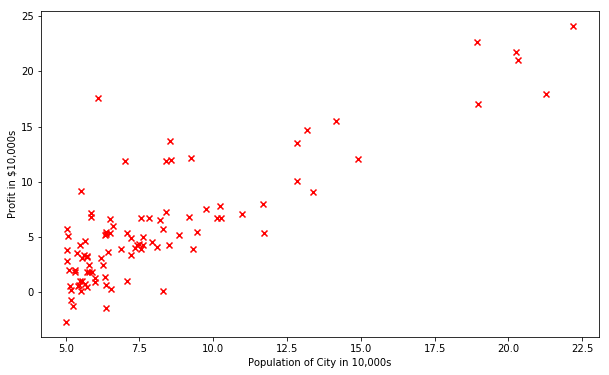

In [7]:
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='r', marker='x')
plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [6]:
import numpy as np

In [8]:
X_ = np.c_[np.ones(m).reshape(m,1), X.reshape(m,1)]
initial_theta = np.zeros(2)
iterations = 1500
alpha = 0.01

In [9]:
def compute_cost(X, y, theta):
    m = y.shape[0]
    J = (1.0 / (2*m)) * np.sum((np.dot(X, theta) - y) ** 2)
    
    return J

In [11]:
compute_cost(X_, y, initial_theta)

32.072733877455676

In [12]:
compute_cost(X_, y, [-1, 2])

54.24245508201238

In [13]:
theta_0 = 0
theta_1 = 0
hypothetis1 = theta_0 + np.dot(X, theta_1)

Text(0,0.5,'Profit in $10,000s')

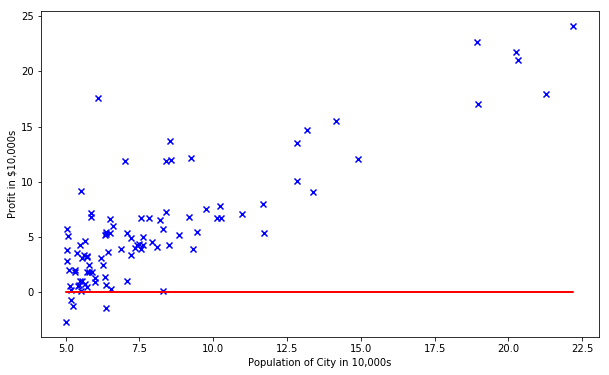

In [14]:
# theta = [0,0]
# y = mx + b
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='b', marker='x')
plt.plot(X, hypothetis1, c='r')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [15]:
theta_0 = -1
theta_1 = 2
hypothetis2 = theta_0 + np.dot(X, theta_1)

Text(0,0.5,'Profit in $10,000s')

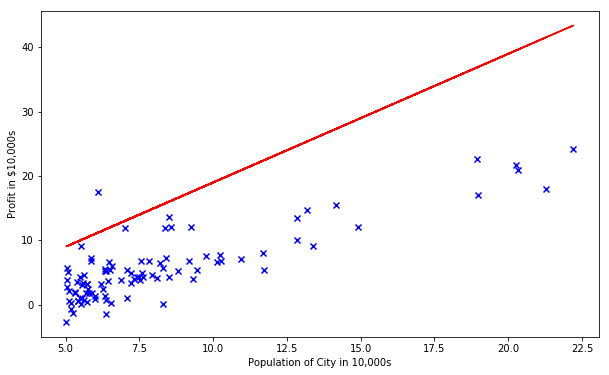

In [16]:
# theta = [0,0]
# y = mx + b
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='b', marker='x')
plt.plot(X, hypothetis2, c='r')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

In [19]:
def gradient_descent(X, y, theta, alpha, num_iters):
    m = y.shape[0]
    J_history = np.zeros([num_iters, 1])
    theta_history = np.zeros([num_iters, 2])
    for iteration in range(num_iters):
        h_of_x = np.dot(X, theta)
        error_x = (alpha * (1.0/m)) * np.sum((h_of_x - y).reshape(m,1) * X, axis=0)
        
        theta = theta - error_x
        J_history[iteration] = compute_cost(X, y, theta)
        theta_history[iteration] = theta
    
    return theta, J_history, theta_history

In [20]:
theta, J_history, theta_history = gradient_descent(X_, y, initial_theta, alpha, iterations)

In [21]:
theta

array([-3.63029144,  1.16636235])

Text(0,0.5,'Profit in $10,000s')

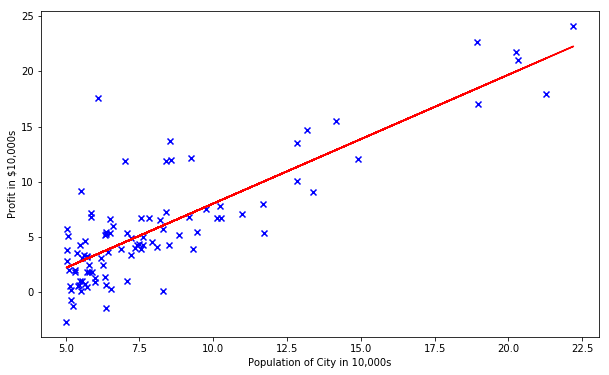

In [22]:
# theta = [0,0]
# y = mx + b
plt.figure(figsize=(10, 6))
plt.scatter(X, y, c='b', marker='x')
plt.plot(X, np.dot(X_, theta), c='r')

plt.xlabel('Population of City in 10,000s')
plt.ylabel('Profit in $10,000s')

Text(0,0.5,'Cost function')

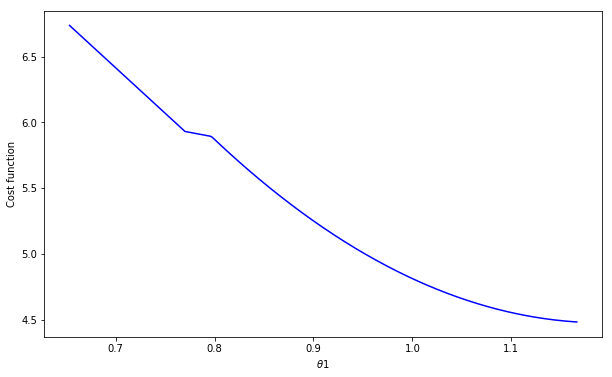

In [24]:
# theta = [0,0]
# y = mx + b
plt.figure(figsize=(10, 6))
plt.plot(theta_history[:, 1], J_history, c='b')

plt.xlabel(r'$\theta1$')
plt.ylabel('Cost function')

<function matplotlib.pyplot.show>

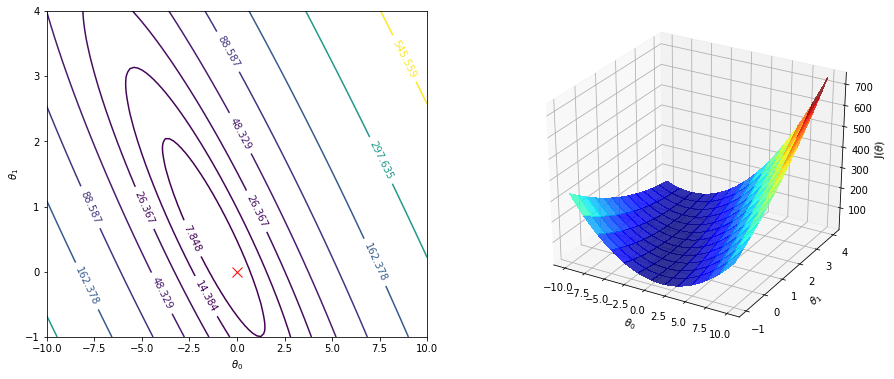

In [25]:
from matplotlib import use, cm
from mpl_toolkits.mplot3d import axes3d

theta0_vals = np.linspace(-10, 10, X.shape[0])
theta1_vals = np.linspace(-1, 4, X.shape[0])

J_vals = np.array(np.zeros(X.shape[0]).T)

for i in range(theta0_vals.size):
    col = []
    for j in range(theta1_vals.size):
        t = np.array([theta0_vals[i], theta1_vals[j]])
        col.append(compute_cost(X_, y, t.T))
    
    J_vals = np.column_stack((J_vals, col))

J_vals = J_vals[:, 1:].T
theta0_vals, theta1_vals = np.meshgrid(theta0_vals, theta1_vals)

fig = plt.figure(figsize=(15,6))
ax1 = fig.add_subplot(121)
ax2 = fig.add_subplot(122, projection='3d')

ax2 = fig.gca(projection='3d')
ax2.plot_surface(theta0_vals, theta1_vals, J_vals, rstride=8, cstride=8, alpha=0.8,
                cmap=plt.cm.jet, linewidth=0, antialiased=False)
ax2.set_xlabel(r'$\theta_0$')
ax2.set_ylabel(r'$\theta_1$')
ax2.set_zlabel(r'J($\theta$)')

ax = ax1.contour(theta0_vals, theta1_vals, J_vals, np.logspace(-2, 3, 20))
ax1.clabel(ax, inline=1, fontsize=10)
ax1.set_xlabel(r'$\theta_0$')
ax1.set_ylabel(r'$\theta_1$')
ax1.plot(0.0, 0.0, 'rx', linewidth=2, markersize=10)
plt.show